# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Данные не содержат пропусков и дубликатов. Данные готовы к работе.

Необходимо удалить в датасетах столбцы `id`, в которых содержатся не нужные для обучения модели данные.

In [5]:
geo_data_0 = geo_data_0.drop('id',axis=1)
geo_data_1 = geo_data_1.drop('id',axis=1) 
geo_data_2 = geo_data_2.drop('id',axis=1) 

## Обучение и проверка модели

Напишем функцию, которая обучит модель и рассчитает RMSE для каждого представленного региона, а так же покажет нам,сколько в среднем хранится запасов сырья в выбранном регионе.

In [6]:
def education_model(data):
    features = data.drop('product',axis=1) 
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=42)# отделяем 25% данных для валидационной выборки
    
    model = LinearRegression()
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    
    result = mean_squared_error(target_valid,predictions_valid,squared=False)
    print('Средний запас предсказанного сырья', predictions_valid.mean())
    print("RMSE на валидационной выборке в данном регионе:", result)
    return [result,predictions_valid,target_valid]

### Предсказания модели по геоданным первого региона

In [7]:
data_0 = education_model(geo_data_0)
target_valid_0 = data_0[2]
predictions_valid_0 = pd.Series(data_0[1],index=list(target_valid_0.index))

Средний запас предсказанного сырья 92.3987999065777
RMSE на валидационной выборке в данном регионе: 37.756600350261685


### Предсказания модели по геоданным второго региона

In [8]:
data_1 = education_model(geo_data_1)
target_valid_1 = data_1[2]
predictions_valid_1 = pd.Series(data_1[1],index=list(target_valid_1.index))

Средний запас предсказанного сырья 68.71287803913762
RMSE на валидационной выборке в данном регионе: 0.890280100102884


### Предсказания модели по геоданным третьего региона

In [9]:
data_2 = education_model(geo_data_2)
target_valid_2 = data_2[2]
predictions_valid_2 = pd.Series(data_2[1],index=list(target_valid_2.index))

Средний запас предсказанного сырья 94.77102387765939
RMSE на валидационной выборке в данном регионе: 40.14587231134218


## Подготовка к расчёту прибыли

In [10]:
#сохраним в переменные необходимые для расчета данные,как требуется в задании.

BUDGET_ALL= 10000000000# готовы потратить на 200 скважин
BARREL_PRICE = 450000# цена за тысячу баррелей
BUDGET_ONE_WELL = BUDGET_ALL/200 # бюджет на одну скважину
PRODUCT_AMOUNT = BUDGET_ONE_WELL/BARREL_PRICE # необходимое количесвто сырья,при условии что цена 450р за 1 баррель
PRODUCT_AMOUNT

111.11111111111111

Учитывая заданные условия, мы видим, что в среднем каждая скважина должна иметь объем сырья минимум 111тыс баррелей. В таком случае, компания сможет выйти в прибыль при добычи нефти с таких скважин.
Теперь посмотрим, сколько сырья храниться в среднем на месторождениях в данных регионах.

In [11]:
geo_data_0['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

In [12]:
geo_data_1['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

In [13]:
geo_data_2['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

Мы видим, что сырья в в большинстве скважин недостаточно чтобы выйти в прибыль.
В первом регионе, второй квантиль уже находится на уровне 94тыс баррелей, значит половина датасета имеет значения выше 95тыс. бар. В третьем регионе картина схожая.

Во втором регионе видим, что большая часть скважин недостаточно наполнена сырьем, лишь 25% скважин имеет достаточный объем. Получить прибыль работая в данном регионе будет достаточно сложно. 



Напишем функцию для расчета прибыли с полученного объёма сырья.

In [15]:
def profit_calc(prediction,target):
    state = np.random.RandomState(42)
    prediction_sample = prediction.sample(n=500, replace=True, random_state=state)
    prediction = prediction_sample.sort_values(ascending=False).head(200)
    target = target[list(prediction.index)]
    profit_calc = target.sum() * BARREL_PRICE
    print('Выгода при работе со скважинами из данного региона составит', profit_calc - BUDGET_ALL)

In [16]:
profit_calc(predictions_valid_0,target_valid_0)

Выгода при работе со скважинами из данного региона составит 571778059.8300972


In [17]:
profit_calc(predictions_valid_1,target_valid_1)

Выгода при работе со скважинами из данного региона составит 691031721.4379349


In [18]:
profit_calc(predictions_valid_2,target_valid_2)

Выгода при работе со скважинами из данного региона составит -27910580.92614174


Исходя из данных расчетов, стоит присмотреться к первому региону. Однако утверждать ничего сейчас не можем, ведь мы не знаем какая реально выборка нам попалась. необходимо воспользоваться методом бутстрепа и разобраться,в каком интервале лежит наше среднее и насколько оно прибыльное. 

## Расчёт прибыли и рисков 

In [19]:
# напишем функции для бутстрепа и подсчета интервала
def bootstrap(prediction,target):
    state = np.random.RandomState(42)
    values = []
    for i in range(1000):
        subsample = prediction.sample(n=500, replace=True, random_state=state)
        subsample_top = subsample.sort_values(ascending=False).head(200)
        target_top = target[list(subsample_top.index)]
        profit_subsample = target_top.sum() * BARREL_PRICE - BUDGET_ALL
        values.append(profit_subsample) 
    return values

def confidence_interval(values):
    lower = values.quantile(0.025)
    upper = values.quantile(0.975) 
    confidence_interval = [lower, upper]
    return confidence_interval

### Расчет прибыли и рисков для первого региона

In [20]:
distribution_geo_data_0 = pd.Series(bootstrap(predictions_valid_0,target_valid_0))
distribution_geo_data_0.mean()

399575478.05422974

<AxesSubplot:>

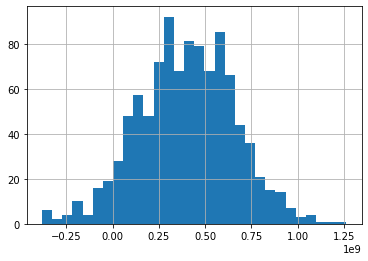

In [21]:
distribution_geo_data_0.hist(bins=30)

In [22]:
confidence_interval(distribution_geo_data_0)

[-110467895.33197226, 897460327.7178793]

In [23]:
distribution_geo_data_0[distribution_geo_data_0 < 0].count() / distribution_geo_data_0.count()

0.06

Для первого региона мы видим нормальное распределение,95 процентов данных сосредоточены в промежутке (-110467895.33197226,897460327.7178793). Средняя прибыль по региону ~400млн.
Однако, в данном регионе вероятность получить убыток = 6%. 

### Расчет прибыли и рисков для второго региона

In [24]:
distribution_geo_data_1 = pd.Series(bootstrap(predictions_valid_1,target_valid_1))
distribution_geo_data_1.mean()

452048890.9064583

<AxesSubplot:>

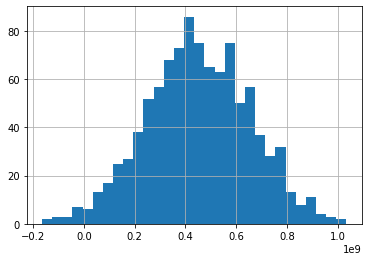

In [25]:
distribution_geo_data_1.hist(bins=30)

In [26]:
confidence_interval(distribution_geo_data_1)

[61684479.65422669, 845340177.5073848]

In [27]:
distribution_geo_data_1[distribution_geo_data_1 < 0].count() / distribution_geo_data_1.count()

0.015

Во втором регионе 452млн прибыли в среднем будет получено. При этом, 95% данных сосредоточены в промежутке от 62млн до 845млн рублей.
Вероятность получить убыток в данном регионе - 1,5%

### Расчет прибыли и рисков для третьего региона

In [28]:
distribution_geo_data_2 = pd.Series(bootstrap(predictions_valid_2,target_valid_2))
distribution_geo_data_2.mean()

375009902.915329

<AxesSubplot:>

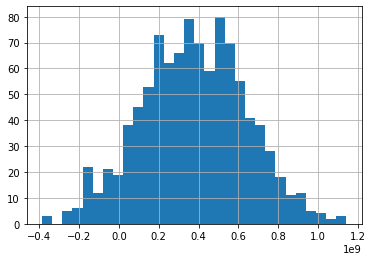

In [29]:
distribution_geo_data_2.hist(bins=30)

In [30]:
confidence_interval(distribution_geo_data_2)

[-144766727.3048927, 888390403.5342213]

In [31]:
distribution_geo_data_2[distribution_geo_data_2 < 0].count() / distribution_geo_data_2.count()

0.08

В третьем регионе средняя прибыль составит 375млн, но при этом 95% значений прибыли лежит в интервале от -144млн(убыток) до 888млн прибыли. Вероятность получить убытки в данном регионе равна 8%

## Выводы

Самым прибыльным регионом, исходя из расчетов, будет второй регион. Вероятность получения убытка при бурении скважин в данном регионе составит 1,5% . В среднем, прибыль в данном регионе составит 452млн. 